In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

import warnings
warnings.filterwarnings('ignore')


In [2]:
#cd C:/UW/WI23/BIOSTAT557/Project/

C:\UW\WI23\BIOSTAT557\Project


In [3]:
# Function to find correl coef for every stock (ONLY FOR GRAPH)
def analysis_stocks(stocks,stocks_to_extract_list):
    results_df = pd.DataFrame(columns=['Stock', 'CCI_Returns_Correlation', 'RSI_Returns_Correlation', 'MACD_Returns_Correlation'])
    
    for stock in stocks_to_extract_list:
        
        # CCI RETURN CORREL
        df = stocks[stocks['SYMBOL']==stock] 
        df['Returns'] = df['CLOSE'].pct_change()
        df = df[df['CCI']>100]
        df.dropna(inplace=True)
        # compute correlation between CCI and stock returns
        cci = np.corrcoef(df['CCI'], df['Returns'])[0, 1]
 
        # RSI RETURN CORREL
        df = stocks[stocks['SYMBOL']==stock]
        df['Returns'] = df['CLOSE'].pct_change()
        df = df[df['RSI']<40]
        df.dropna(inplace=True)
        # compute correlation between RSI and stock returns
        rsi = np.corrcoef(df['RSI'], df['Returns'])[0, 1]
 
        # MACD RETURN CORREL
        df = stocks[stocks['SYMBOL']==stock]        
        df['Returns'] = df['CLOSE'].pct_change()
        df.dropna(inplace=True)
        # compute correlation between MACD and stock returns
        macd = np.corrcoef(df['MACD'], df['Returns'])[0, 1]

  
        results_df = results_df.append({'Stock': stock, 'CCI_Returns_Correlation': cci, 'RSI_Returns_Correlation': rsi, 'MACD_Returns_Correlation': macd}, ignore_index=True)
    return results_df

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stocks = pd.read_csv('Top100stocks_indicator.csv')


top100 = pd.read_csv('ind_nifty100list.csv')
stocks_to_extract_list = top100['Symbol'].unique()

df = analysis_stocks(stocks,stocks_to_extract_list)


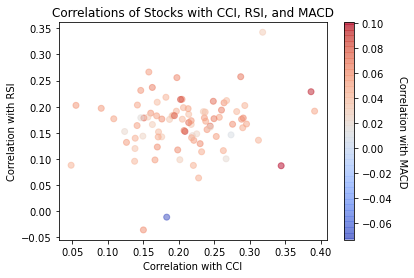

In [5]:
# create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(
    x=df['CCI_Returns_Correlation'],
    y=df['RSI_Returns_Correlation'],
    c=df['MACD_Returns_Correlation'],
    cmap='coolwarm',
    alpha=0.5
)

# add colorbar for the correlation with MACD
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel('Correlation with MACD', rotation=270, labelpad=15)

# add labels and title
ax.set_xlabel('Correlation with CCI')
ax.set_ylabel('Correlation with RSI')
ax.set_title('Correlations of Stocks with CCI, RSI, and MACD')

# show the plot
plt.show()

To test if there is any relationship between the columns "returns", "CCI", "RSI", and "MACD", we can use a correlation analysis. Correlation analysis measures the strength and direction of the relationship between two or more variables.

We can calculate the correlation coefficient between each pair of variables, and then determine if the coefficients are statistically significant.

We use the Pearson correlation coefficient, which measures the linear relationship between two continuous variables.

Test the statistical significance of the correlation coefficients using a hypothesis test. The null hypothesis is that there is no correlation between the variables, and the alternative hypothesis is that there is a correlation. We use a two-tailed t-test with a significance level of 0.05.

If the p-value of the t-test is less than 0.05, we can reject the null hypothesis and conclude that there is a significant correlation between the variables. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant correlation.

We used a two-tailed test because we wanted to determine whether there was a significant difference between the correlation coefficient and zero, regardless of the direction of the correlation.

For example, if the correlation coefficient between "returns" and "CCI" was positive, a one-tailed test would only test whether the correlation was significantly greater than zero. A two-tailed test, on the other hand, would also test whether the correlation was significantly less than zero. This is important because even a negative correlation can be significant and informative.

Therefore, by using a two-tailed t-test, we are testing whether the correlation coefficient is significantly different from zero, regardless of the direction of the correlation.

In [6]:
df = pd.read_csv("Top100stocks_indicator.csv")
df['Returns'] = df['CLOSE'].pct_change()
df.dropna(inplace=True)
df

,TIMESTAMP,SYMBOL,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,Typical Price,SMA,Mean Deviation,CCI,RSI,MACD,Signal,Histogram,Returns
66,28-10-2021,ZOMATO,135.35,136.50,131.50,135.60,135.50,134.80,11936370,1.592582e+09,82472,134.533333,138.136765,2.913725,-82.447286,47.377622,-0.427251,-0.058903,-0.368348,0.005935
67,29-10-2021,ZOMATO,135.00,135.00,130.50,131.55,131.70,135.60,12925877,1.705536e+09,107530,132.350000,137.867647,2.867921,-128.261252,42.744479,-0.781654,-0.203453,-0.578201,-0.029867
68,01-11-2021,ZOMATO,133.60,134.30,132.00,132.65,132.55,131.55,6200243,8.259720e+08,52656,132.983333,137.569118,2.760943,-110.729908,43.457944,-0.962663,-0.355295,-0.607368,0.008362
69,02-11-2021,ZOMATO,132.70,133.60,131.75,132.45,132.40,132.65,7367792,9.772073e+08,63828,132.600000,137.223529,2.626024,-117.377197,43.525741,-1.109463,-0.506128,-0.603334,-0.001508
70,03-11-2021,ZOMATO,132.90,132.90,127.50,128.35,128.70,132.45,15919925,2.058662e+09,128004,129.583333,136.834804,2.619738,-184.534273,39.857143,-1.538899,-0.712683,-0.826217,-0.030955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141586,26-12-2022,ACC,2372.00,2448.50,2360.00,2423.65,2429.15,2374.10,480611,1.165814e+09,33035,2410.716667,2532.664216,117.982771,-68.906981,28.940073,-1.850621,30.858689,-32.709310,0.020871
141587,27-12-2022,ACC,2430.95,2487.95,2428.10,2478.00,2486.00,2423.65,260633,6.408237e+08,17590,2464.683333,2532.916667,117.570026,-38.690890,37.407735,-6.263760,23.434199,-29.697960,0.022425
141588,28-12-2022,ACC,2475.00,2477.00,2447.55,2455.35,2456.00,2478.00,201331,4.953475e+08,10875,2459.966667,2534.337255,118.382656,-41.881466,33.905704,-11.456804,16.455999,-27.912803,-0.009140
141589,29-12-2022,ACC,2455.00,2467.70,2411.15,2447.85,2446.70,2455.35,352346,8.594227e+08,25719,2442.233333,2535.506863,119.860107,-51.879107,33.531613,-15.993157,9.966168,-25.959325,-0.003055


In [7]:
#CCI~Returns Correlation

import pandas as pd
from scipy.stats import pearsonr, ttest_ind, t

# List of symbols to loop through
symbols = df['SYMBOL'].unique()

# Initialize a list to store the results
results = []

for symbol in symbols:
    # Load the data into a Pandas DataFrame
    data = df[df["SYMBOL"] == symbol]
    data = data[data['CCI']>100]
    
    if len(data)!=0:
        # Calculate the correlation coefficients
        try:
            corr_returns_cci, _ = pearsonr(data['Returns'], data['CCI'])
            n = len(data)
            dof = n - 2  # degrees of freedom
            t_critical = t.ppf(0.975, dof)  # t-value for 95% confidence level
            SE = np.sqrt((1 - corr_returns_cci ** 2) / dof)
            CI_low = corr_returns_cci - (t_critical * SE)
            CI_high = corr_returns_cci + (t_critical * SE)
            # Calculate the test statistic
            t_stat = corr_returns_cci / SE
            
            
        except (TypeError, ValueError) as e:
            print(f"Error: {e}")
            # Handle the error in some way, e.g. by setting the correlation coefficient to NaN:
            corr_returns_cci = np.nan
            CI_low = np.nan
            CI_high = np.nan
            t_stat = np.nan
    
        # Test the statistical significance
        p_returns_cci = ttest_ind(data['Returns'], data['CCI'])[1]
    
    
        # Store the results in a dictionary
        result = {
            'Symbol': symbol,
            'Corr_returns_cci': corr_returns_cci,
            'P_returns_cci': p_returns_cci,
            't_stat': t_stat,
            'CI_low': CI_low,
            'CI_high': CI_high
        }

    
        # Append the result to the list
        results.append(result)
    
# Create a DataFrame from the results list
df_results = pd.DataFrame(results)
df_results.dropna(inplace=True)

# Print the results
df_results['pflag'] = np.where(df_results['P_returns_cci']<0.05, True, False)
print('Total Stocks:',len(df_results))
print('Reject H0:',len(df_results[df_results['pflag']==True]))

df_results.to_csv('CCICorrelationPval.csv',index=False)

Error: x and y must have length at least 2.
Total Stocks: 88
Reject H0: 88


In [8]:
#RSI~Returns Correlation

import pandas as pd
from scipy.stats import pearsonr, ttest_ind, t

# List of symbols to loop through
symbols = df['SYMBOL'].unique()

# Initialize a list to store the results
results = []

for symbol in symbols:
    # Load the data into a Pandas DataFrame
    data = df[df["SYMBOL"] == symbol]
    data = data[data['RSI']<40]
    
    if len(data)!=0:
        # Calculate the correlation coefficients
        try:
            corr_returns_rsi, _ = pearsonr(data['Returns'], data['RSI'])
            n = len(data)
            dof = n - 2  # degrees of freedom
            t_critical = t.ppf(0.975, dof)  # t-value for 95% confidence level
            SE = np.sqrt((1 - corr_returns_rsi ** 2) / dof)
            CI_low = corr_returns_rsi - (t_critical * SE)
            CI_high = corr_returns_rsi + (t_critical * SE)
            # Calculate the test statistic
            t_stat = corr_returns_rsi / SE
            
            
        except (TypeError, ValueError) as e:
            print(f"Error: {e}")
            # Handle the error in some way, e.g. by setting the correlation coefficient to NaN:
            corr_returns_rsi = np.nan
            CI_low = np.nan
            CI_high = np.nan
            t_stat = np.nan
    
        # Test the statistical significance
        p_returns_rsi = ttest_ind(data['Returns'], data['RSI'])[1]
    
    
        # Store the results in a dictionary
        result = {
            'Symbol': symbol,
            'Corr_returns_rsi': corr_returns_rsi,
            'P_returns_rsi': p_returns_rsi,
            't_stat': t_stat,
            'CI_low': CI_low,
            'CI_high': CI_high
        }

    
        # Append the result to the list
        results.append(result)
    
# Create a DataFrame from the results list
df_results = pd.DataFrame(results)
df_results.dropna(inplace=True)

# Print the results
df_results['pflag'] = np.where(df_results['P_returns_rsi']<0.05, True, False)
print('Total Stocks:',len(df_results))
print('Reject H0:',len(df_results[df_results['pflag']==True]))

df_results.to_csv('RSICorrelationPval.csv',index=False)

Total Stocks: 90
Reject H0: 90
